### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1.A) Reading the Dataset

In [2]:
signal_df = pd.read_csv(r"C:\Users\Jupally Pavan Kumar\Downloads\signal-data.csv")

In [3]:
signal_df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
signal_df.shape

(1567, 592)

- There are 1567 rows and 592 columns in the dataset.

In [5]:
signal_df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

- 'Time' column is of 'object' type. Let's convert this feature to 'date_time' formate.

In [6]:
signal_df['Time'] = pd.to_datetime(signal_df['Time'])

### 1.B) Let's print the 5 point summary

In [7]:
signal_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Time,1567,2008-07-30 21:44:12.712188928,2008-01-08 02:02:00,2008-07-09 15:32:00,2008-08-23 13:02:00,2008-09-22 11:16:30,2008-12-10 18:47:00,NaN
0,1561.0,3014.452896,2743.24,2966.26,3011.49,3056.65,3356.35,73.621787
1,1560.0,2495.850231,2158.75,2452.2475,2499.405,2538.8225,2846.44,80.407705
2,1553.0,2200.547318,2060.66,2181.0444,2201.0667,2218.0555,2315.2667,29.513152
3,1553.0,1396.376627,0.0,1081.8758,1285.2144,1591.2235,3715.0417,441.69164
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,-0.0169,0.013425,0.0205,0.0276,0.1028,0.012358
587,1566.0,0.016475,0.0032,0.0106,0.0148,0.0203,0.0799,0.008808
588,1566.0,0.005283,0.001,0.0033,0.0046,0.0064,0.0286,0.002867
589,1566.0,99.670066,0.0,44.3686,71.9005,114.7497,737.3048,93.891919


### Observations

- There are some missing values in some of the features as all features record counts are not 1567.
- There might be significant outliers present in the column '3' as there is a lot of diffeerence between 75% percentile and maximum.
- We can observe that scaling is also needed as the distributions of the data points vary significantly.

### 2.A) Let's run a for loop to remove the missing values features(>20%).

In [8]:
total = len(signal_df)
for col in signal_df.columns:
    missing_values_total = signal_df[col].isnull().sum()
    if missing_values_total/total > 0.20:
        signal_df.drop(col, axis = 1, inplace = True)
    else:
        signal_df[col] = signal_df[col].fillna(signal_df[col].mean())

In [9]:
# Let's print the shape of the dataset.
signal_df.shape

(1567, 560)

- We have successfully treated all the missing values.
- Feature size is decreased to 560.

### 2.B) Let's drop the features which are having same data for all the  rows.

In [10]:
li = []
for column in signal_df.columns:
    if signal_df[column].nunique() == 1:
        li.append(column)

In [11]:
print(f"* There are '{len(li)}' fetures are having similar data for all the rows.\n")
print(li)

* There are '116' fetures are having similar data for all the rows.

['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']


#### * Let's drop these columns from the dataset

In [12]:
signal_df.drop(li, axis = 1, inplace = True)
signal_df.shape

(1567, 444)

- Now features are reduced to 444.

### 2.C) Let's check if there are abnormal features in the dataset

- Let's check whethere there are zero standard deviation fetures or not.

In [13]:
li_2 = []
for col in signal_df.columns:
    if signal_df[col].std() == 0:
        li_2.append(col)
print(len(li_2))

0


- There are no such features in the dataset.
- 'Time' column is also not important for the prediction, so remove this columns from the dataset.
- Let's check for the duplicated records in the dataset.

In [14]:
# Let's drop 'Time' Feature.

signal_df.drop(['Time'], axis = 1, inplace = True)

In [15]:
signal_df.duplicated().sum()

0

- There are no duplicated records in the dataset.
- Let's check for the outliers in the data.

In [16]:
outlier_cols = []
for column in signal_df.columns:
    Q1 = signal_df[column].quantile(0.25)
    Q3 = signal_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    if ((signal_df[column] < lower_bound) | (signal_df[column] > upper_bound)).any():
        outlier_cols.append(column)

In [17]:
print(f"There are '{len(outlier_cols)}' columns have ouliers.")

There are '423' columns have ouliers.


- Out of 444 columns, 423 columns have significant outliers.
- So, these outliers might be True as the column names are unknown.
- If we impute with mean, or median the distribution of the data may be effected.
- Hence, we can apply 'PCA' on the data after scaling and splitting the data.

### 2.D) Let's check for the multicollinearity of the features.

In [18]:
# Let's calculate a correlation matrix.
corr_matrix = signal_df.corr().abs()

- Let's take only the upper_triangle of the correlation_matrix to avoid the duplication.

In [19]:
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

# Now let's extract the columns which are having a correlation >=90% except with  the target feature['Pass/Fail'].

multi_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] >= 0.90) and col != 'Pass/Fail']
print(f"There are '{len(multi_corr)}' Features that are highly correlated with other features.")

There are '195' Features that are highly correlated with other features.


- Now, let's check these columns are correleted with the target feature or not.
- If they are correlated with 'Pass/Fail', then keep the features other wise drop those features.

In [20]:
target_corr = []
for i in multi_corr:
    target_corr.append(abs(signal_df[i].corr(signal_df['Pass/Fail'])))
for value, column in zip(target_corr, multi_corr):
    if value <= 0.30:
        signal_df.drop(column, axis = 1, inplace = True)

In [21]:
signal_df.shape

(1567, 248)

- Column size of the dataset is reduced to 248.

### 2.E) Relevent Modifications:

- The dataset's feature size is reduced from 592 to 248.
- We have removed the fetures which are not explaining any variance or zero stdandard deviation.
- There are a lot of fetures which are correlated with each other, so we dropped all the multi collinear fetures which are not correlated with the target column.
- But there might be some fetures which do not help in the prediction of the target variable.
- So, we need to apply PCA on the data after scaling, splitting the data.
- There are significant outliers present in all of the columns in the dataset.

### 3.A) Univariate analysis

- There are a lot of features in the data and the names are also unknown.
- So, let's take some random columns and perform the analysis.

In [22]:
import random
random.seed(42)
rand_cols = random.sample(signal_df.columns.tolist(), k = 10)

#### Let's plot the histogram for each feture of the rand_cols

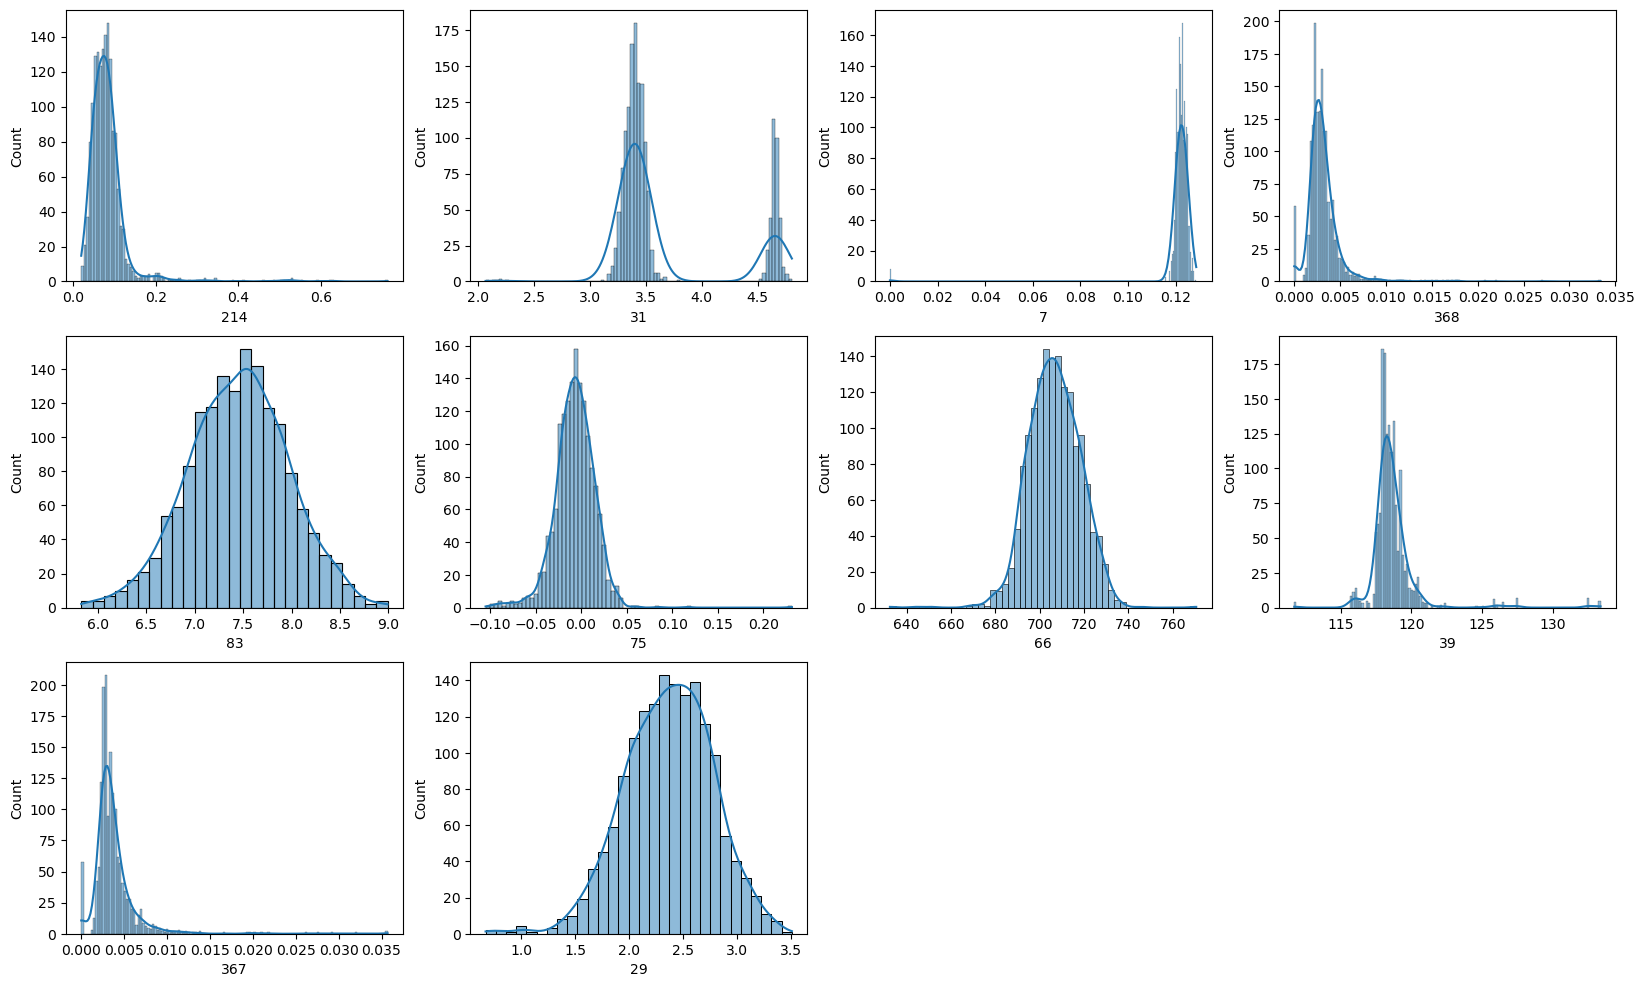

In [23]:
plt.figure(figsize = (20, 12))
for i, column in enumerate(rand_cols):
    plt.subplot(3,4, i+1)
    sns.histplot(data = signal_df, x = column, kde = True)
    plt.plot()

- Columns 214, 7, 368,, 39 and 367 are skewed significantly.
- There might be a lot of outliers in these columns.
- 83, 66 are like following a normal distribution.
-  column 29 also looks like a normal distribution but not entirely.
- As we took only random features, there might be a lot of skewed data with a lot of outliers.

#### Let's plot boxplot for the above features

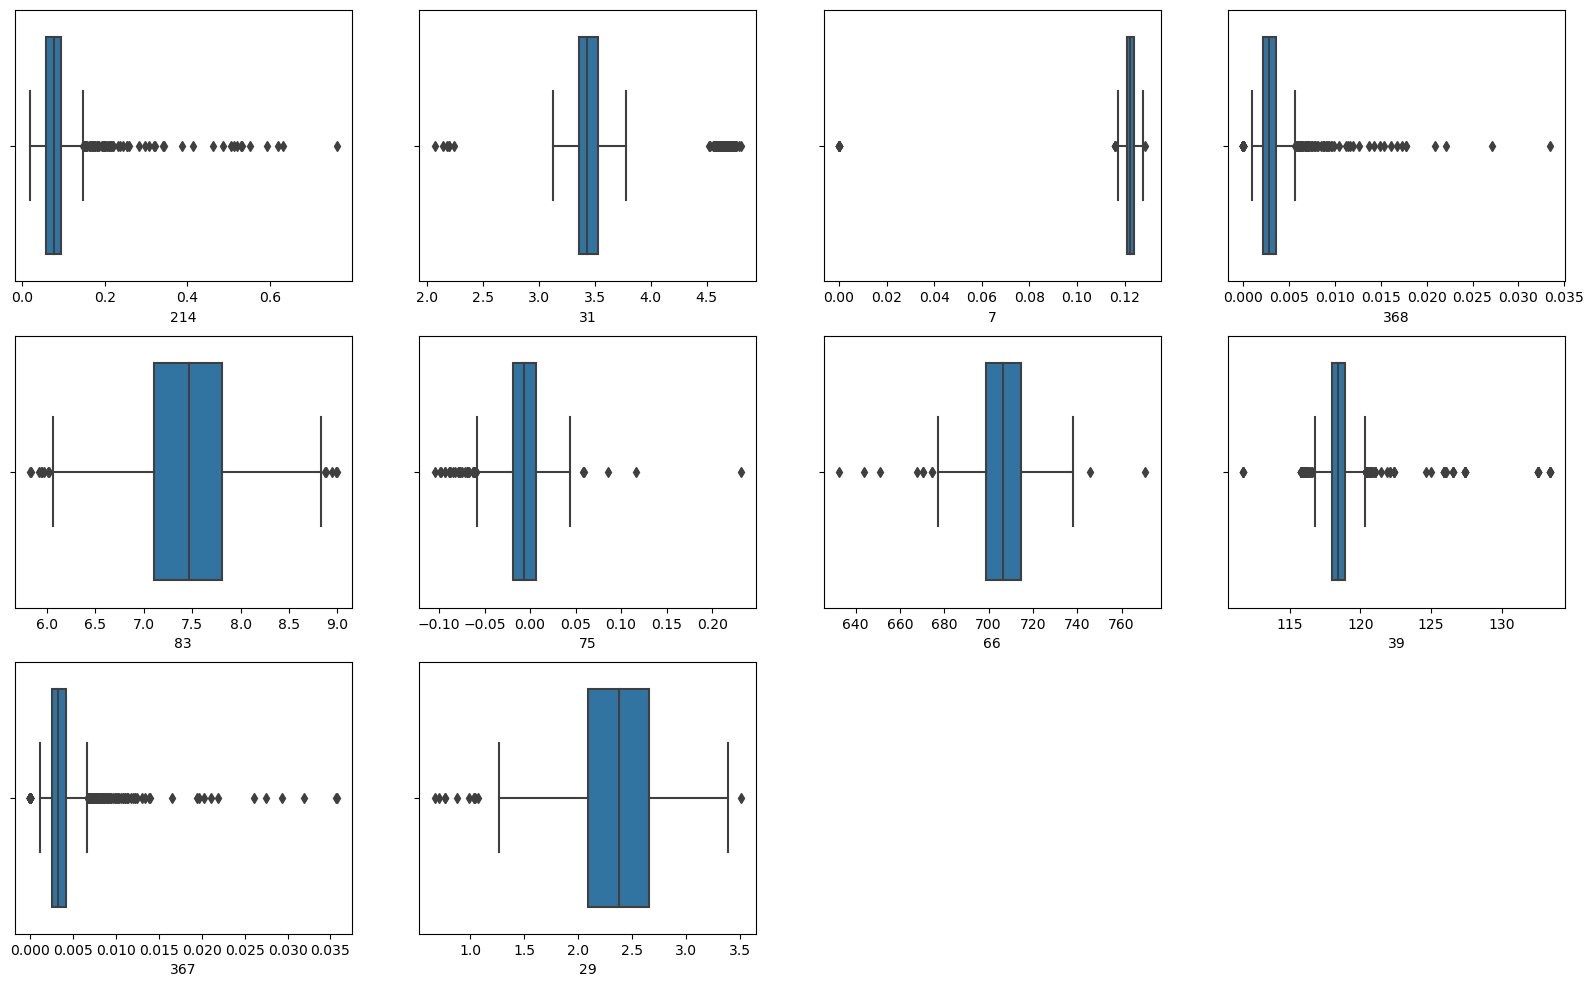

In [24]:
plt.figure(figsize = (20, 12))
for i, column in enumerate(rand_cols):
    plt.subplot(3,4, i+1)
    sns.boxplot(data = signal_df, x = column)
    plt.plot()

- We can observe that there are a lot of outliers in all the features.
- In column '7', there is one significant oulier which causes the skewness of the column.

#### Let's check the counts of the output variable using a countplot

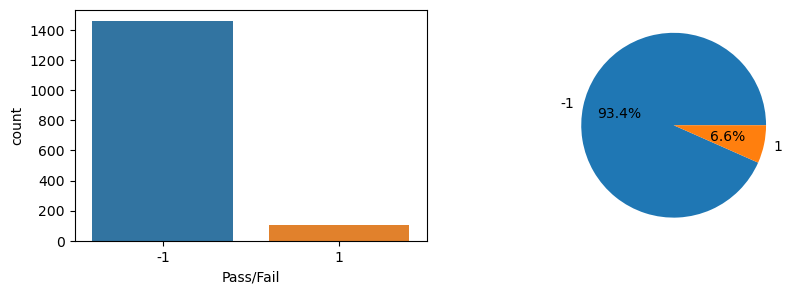

In [25]:
plt.figure(figsize = (10,3))
plt.subplot(121)
sns.countplot(data = signal_df, x = 'Pass/Fail')
plt.subplot(122)
counts = signal_df['Pass/Fail'].value_counts()
labels = counts.index
plt.pie(counts, labels=labels, autopct='%1.1f%%');

- There is class imbalance in the datset.
- The 'Pass' class data points are less than the Fail class datapoints.
- The 'Pass' class data points are below 200 out of 1567 records in the data set.

### 3.B) Bi variate and Multi variate analysis

- Let's take some features for Bi-variate analysis.
- As we have 250 records approximately, it is better to aviod pair plot as it take a lot of time to load.

#### Let's do the scatter plot for selected features with the target column as hue.

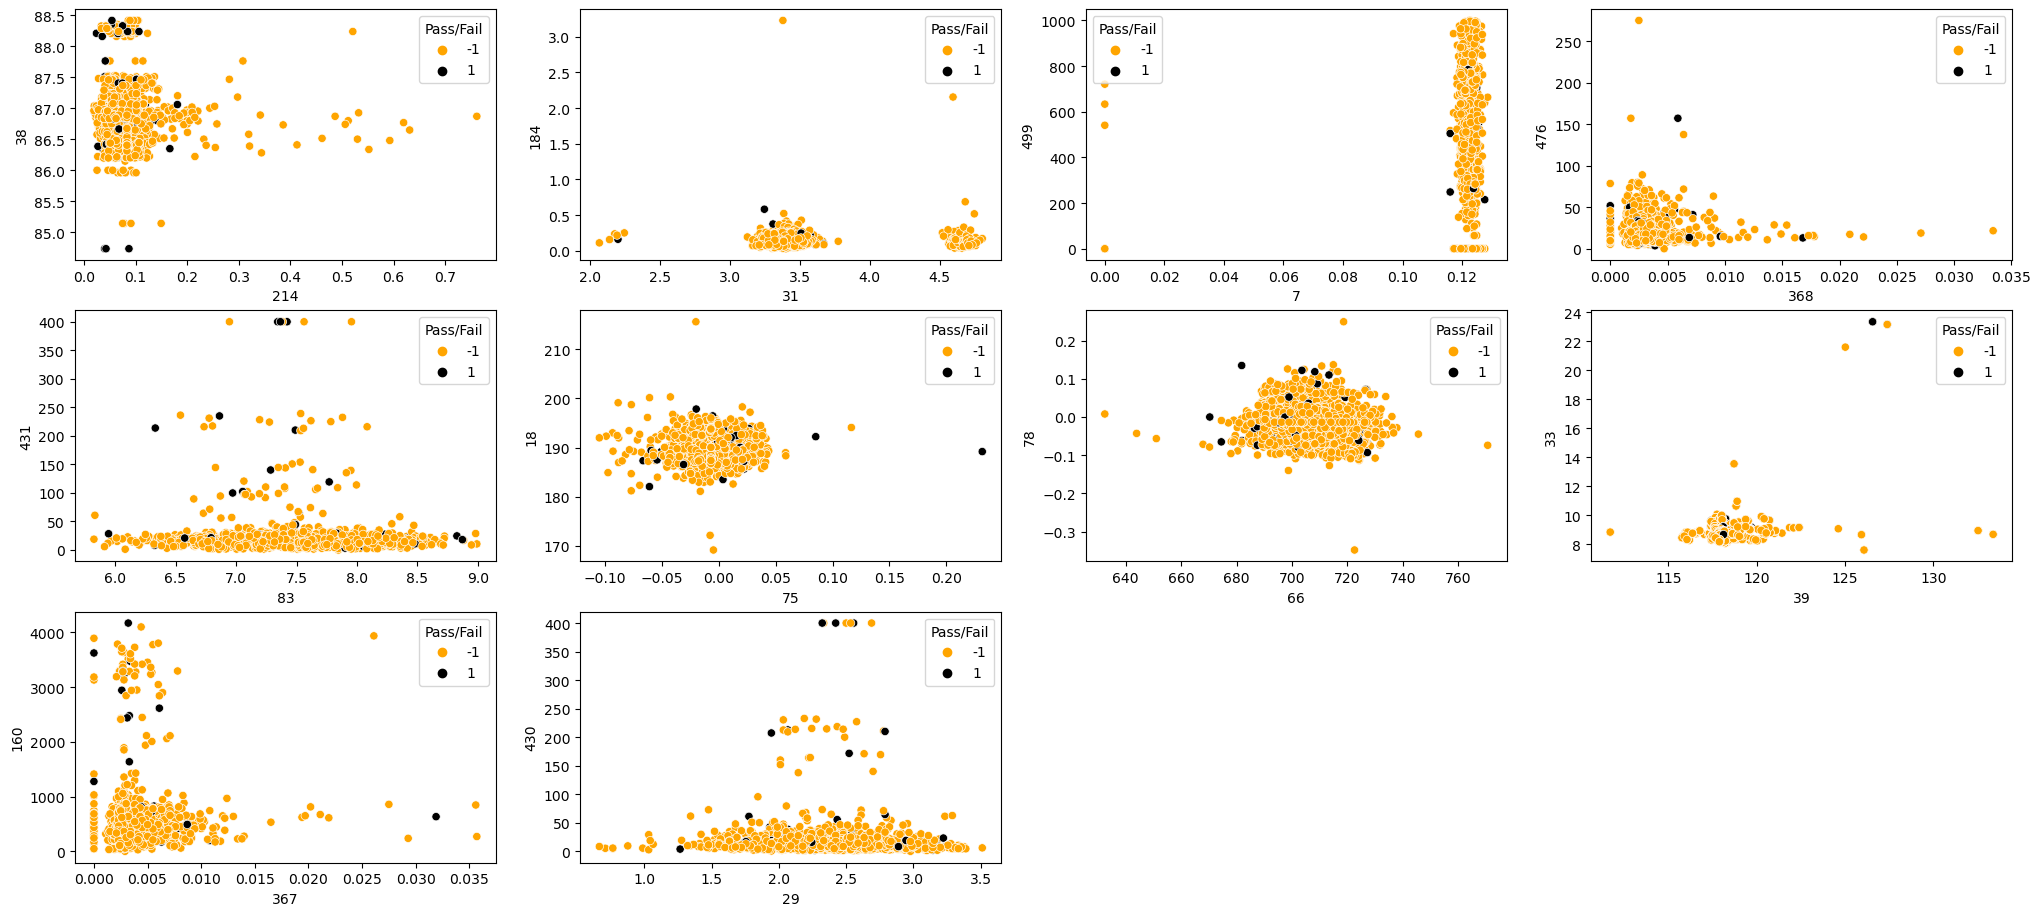

In [26]:
random.seed(1)
rand_cols2 = random.sample(signal_df.columns.tolist(), k = 10)
plt.figure(figsize = (25,15))
for i, (column1, column2) in enumerate(zip(rand_cols, rand_cols2)): 
    plt.subplot(4,4,i+1)
    sns.scatterplot(data = signal_df, x = column1, y = column2, hue = 'Pass/Fail', palette = {1:'black', -1:'orange'})
    plt.plot()

- In the above scatter plots, scatter plot for columns 31 and 184 formed 3 significant clusters.
- columns 18, 75 and columns 66, 78 formed a clould like structure almost.So, they are not correleated with each other.
- There is no such significant trend in any scatter plot.
- There is no such clue for predicting target with the above features as there is no such significant spread of the classes.

<Axes: >

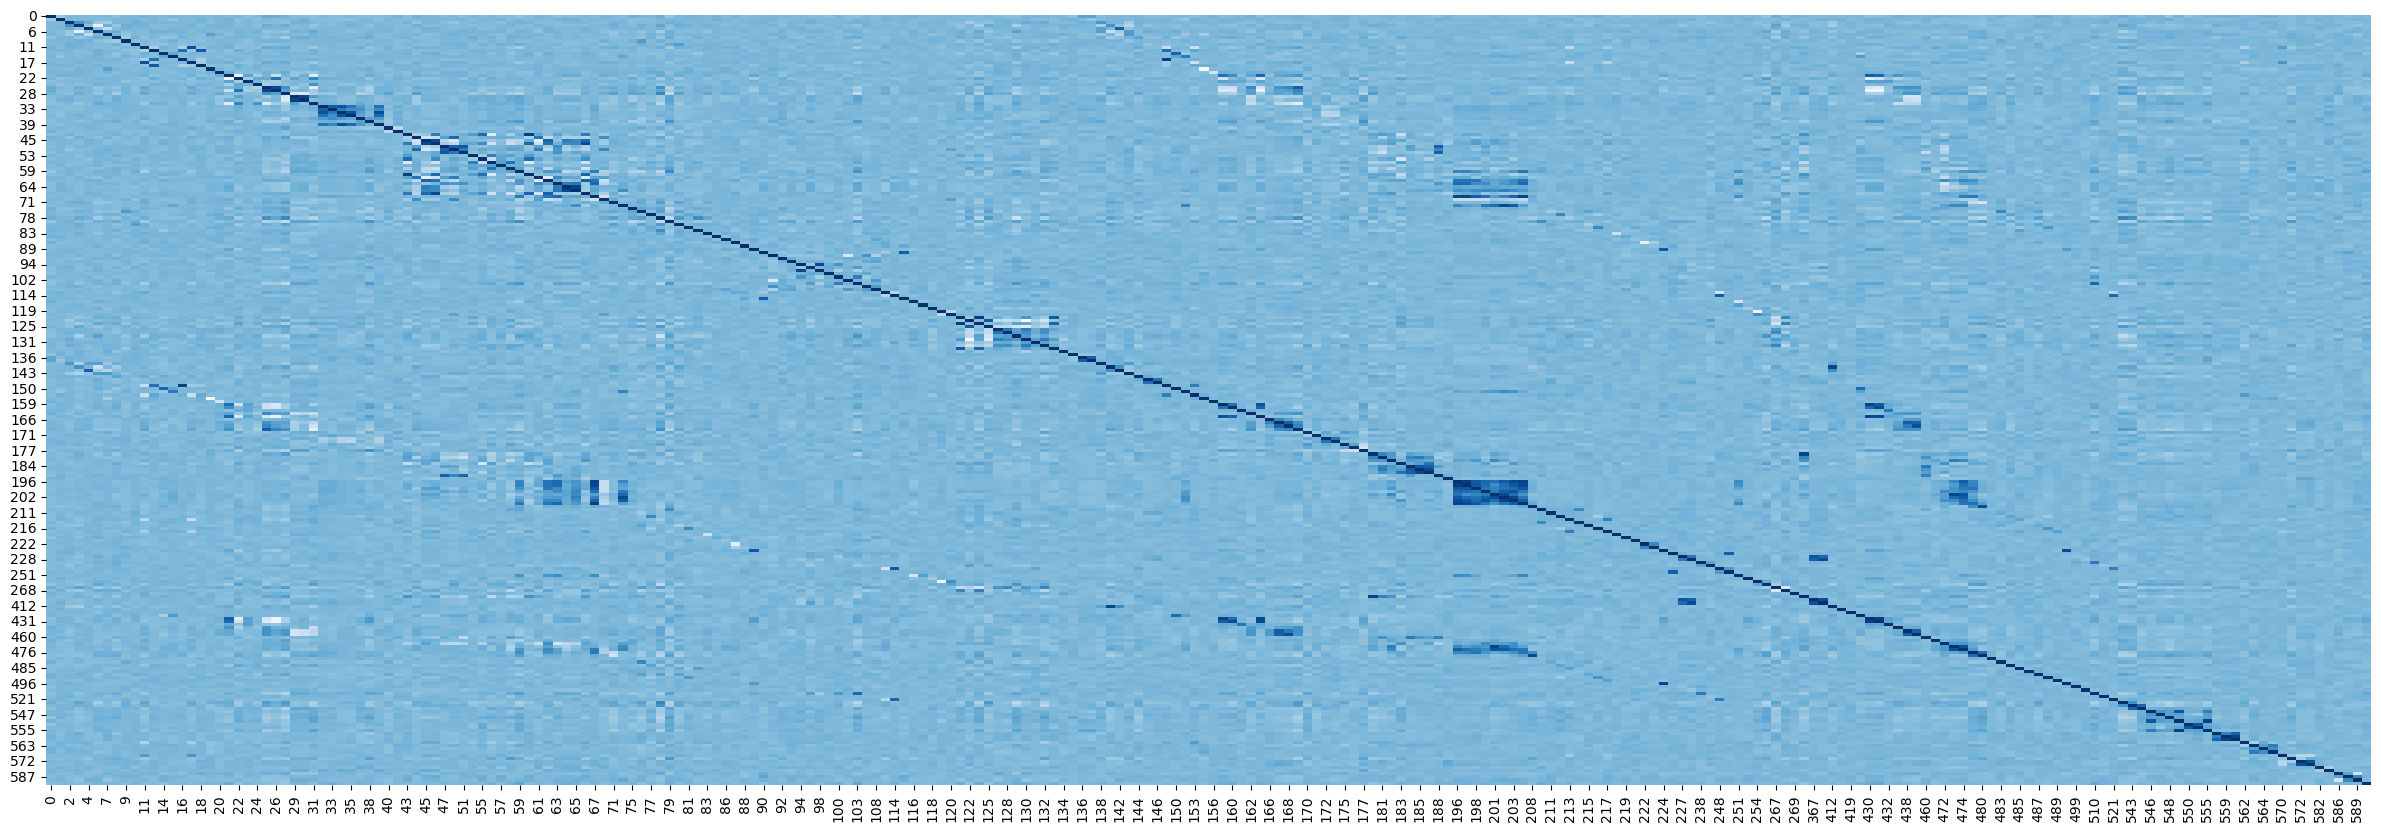

In [27]:
plt.figure(figsize=(30, 10))
sns.heatmap(signal_df.corr(), cmap='Blues', cbar=False)

- From the heatmap, we can see that there is no such correlation between input features.
- As we removed the correlated columns, only some of the places look like blue.

### 4.A) Let's segregate the Inputs and output variables.

In [28]:
X = signal_df.drop('Pass/Fail', axis = 1)
y = signal_df['Pass/Fail']

In [29]:
X.head()

,0,1,2,3,4,6,7,8,9,10,...,565,570,571,572,573,582,583,586,587,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.14561,533.8500,2.1113,8.95,0.3157,0.5005,0.0118,0.021458,0.016475,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.14561,535.0164,2.4335,5.92,0.2653,0.5019,0.0223,0.009600,0.020100,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.62190,535.0245,2.0293,11.21,0.1882,0.4958,0.0157,0.058400,0.048400,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.16300,530.5682,2.0253,9.33,0.1738,0.4990,0.0103,0.020200,0.014900,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.14561,532.0155,2.0275,8.83,0.2224,0.4800,0.4766,0.020200,0.014900,73.843200


In [30]:
y.head()

0   -1
1   -1
2    1
3   -1
4   -1
Name: Pass/Fail, dtype: int64

### 4.B) Let's check whether the target feature classes are balanced or not

In [31]:
pd.DataFrame({'values':y.value_counts(), 'Percentage':y.value_counts(normalize = True)})

,values,Percentage
Pass/Fail,,
-1,1463,0.933631
1,104,0.066369


- Here, we can observe that the classes in the target variable are not balanced.
- Class_ -1(Fail) occupied 93.3% of the data in the y-variable.
- If we train a model on this data, then the model will be biased towards the majority class(-1).
- So, Let's apply 'SMOTE' to balance the data.
- We can also use Under sampling methods, but we may end up losing some information.So it is better to use Over samplin|g techniques(SMOTE).
- Let's apply SMOTE after splitting the data into training and testing.

### 4.C) Let's perform splitting and standarizing

In [32]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [33]:
# Let's split the data ino train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [34]:
y_test.value_counts()

Pass/Fail
-1    440
 1     31
Name: count, dtype: int64

- Let's balance and scale the data.

In [35]:
# Let's apply SMOTE on the training set.

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(f"Before applying SMOTE, Training size is {X_train.shape}")
print(f"After applying SMOTE, Training size is {X_resampled.shape}")

Before applying SMOTE, Training size is (1096, 247)
After applying SMOTE, Training size is (2046, 247)


In [36]:
y_resampled.value_counts()

Pass/Fail
-1    1023
 1    1023
Name: count, dtype: int64

In [37]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_resampled)
test_scaled = scaler.transform(X_test)

#### Let's check the value_counts of the target variable after applying SMOTE.

- Now the data is balanced.

### 4.D)

In [38]:
signal_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.452896,73.480613,2743.2400,2966.66500,3011.8400,3056.5400,3356.3500
1,1567.0,2495.850231,80.227793,2158.7500,2452.88500,2498.9100,2538.7450,2846.4400
2,1567.0,2200.547318,29.380932,2060.6600,2181.09995,2200.9556,2218.0555,2315.2667
3,1567.0,1396.376627,439.712852,0.0000,1083.88580,1287.3538,1590.1699,3715.0417
4,1567.0,4.197013,56.103066,0.6815,1.01770,1.3171,1.5296,1114.5366
...,...,...,...,...,...,...,...,...
583,1567.0,0.015318,0.017174,0.0060,0.01160,0.0138,0.0165,0.4766
586,1567.0,0.021458,0.012354,-0.0169,0.01345,0.0205,0.0276,0.1028
587,1567.0,0.016475,0.008805,0.0032,0.01060,0.0148,0.0203,0.0799
589,1567.0,99.670066,93.861936,0.0000,44.36860,72.0230,114.7497,737.3048


In [39]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1096.0,3015.748444,74.960138,2743.2400,2966.082500,3012.620000,3058.670000,3356.3500
1,1096.0,2496.708951,81.246902,2158.7500,2451.747500,2500.090000,2539.742500,2839.4600
2,1096.0,2200.000884,30.067029,2060.6600,2181.155500,2200.547318,2217.452775,2315.2667
3,1096.0,1391.747116,435.538113,0.0000,1081.875800,1287.353800,1586.947600,3715.0417
4,1096.0,5.425741,67.054730,0.6815,1.020300,1.320400,1.529100,1114.5366
...,...,...,...,...,...,...,...,...
582,1096.0,0.499954,0.003409,0.4778,0.497800,0.500000,0.502225,0.5098
583,1096.0,0.015642,0.020267,0.0060,0.011600,0.013850,0.016600,0.4766
586,1096.0,0.021360,0.012419,-0.0060,0.013275,0.020100,0.027600,0.1028
587,1096.0,0.016336,0.008667,0.0032,0.010600,0.014800,0.020300,0.0799


In [40]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
0,471.0,3011.438201,69.901324,2770.4000,2967.77500,3008.9800,3052.97500,3224.1000
1,471.0,2493.852019,77.852951,2186.0600,2455.47000,2496.0900,2534.70000,2846.4400
2,471.0,2201.818850,27.708018,2117.5889,2180.96665,2202.5556,2218.81110,2304.2111
3,471.0,1407.149334,449.561349,711.0258,1084.37790,1287.3538,1602.23690,3619.7397
4,471.0,1.337807,0.401008,0.6815,1.01280,1.2981,1.55570,2.5874
...,...,...,...,...,...,...,...,...
582,471.0,0.500427,0.003370,0.4902,0.49810,0.5005,0.50255,0.5092
583,471.0,0.014564,0.005004,0.0068,0.01150,0.0135,0.01620,0.0437
586,471.0,0.021688,0.012212,-0.0169,0.01390,0.0215,0.02755,0.1028
587,471.0,0.016797,0.009119,0.0032,0.01060,0.0149,0.02055,0.0799


#### Observations:

- There are 1046 records in training set and 471 records in testing set.
- There is some difference between mean, std, median and so on in three data sets.
- Mean for the original data's column 1 was 3015, 3011 for testing and 3015 for training.
- from the above summary, there is no such significant difference between those three sets.

### 5.A) Let's train a SVM model on the data.

In [41]:
from sklearn.metrics import *

# Lets create a function to print all the possible metrics.
def print_metrics(y_actual, y_pred):
    print(f"Accuracy_score = {accuracy_score(y_actual, y_pred)}")
    print(f"Precision_score = {precision_score(y_actual, y_pred)}")
    print(f"Recall_score = {recall_score(y_actual, y_pred)}")
    print(f"F1_score = {f1_score(y_actual, y_pred)}")
    print(f"AUC_score = {roc_auc_score(y_actual, y_pred)}")

# Let's create a function to print confusion_matrix.
def cm(y_actual, y_pred):
    cm = confusion_matrix(y_actual, y_pred)
    cm = pd.DataFrame(cm, columns = ['Pred(-1)', 'Pred(1)'], index = ['Actual(-1)', 'Actual(1)'])
    plt.figure(figsize = (3,3))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'g')

* Scores on Training data: 
--------------------------
Accuracy_score = 1.0
Precision_score = 1.0
Recall_score = 1.0
F1_score = 1.0
AUC_score = 1.0

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.9320594479830149
Precision_score = 0.3333333333333333
Recall_score = 0.03225806451612903
F1_score = 0.058823529411764705
AUC_score = 0.5138563049853373


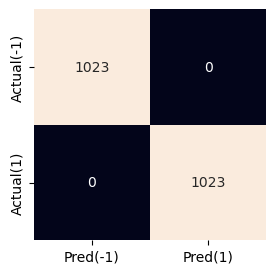

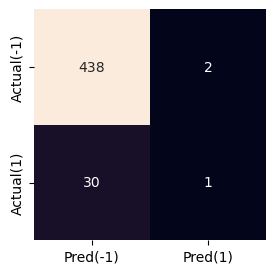

In [42]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(train_scaled, y_resampled)
y_pred_train = svm.predict(train_scaled)
y_pred_test = svm.predict(test_scaled)
print("* Scores on Training data:", "\n--------------------------")
cm(y_pred_train, y_resampled)
print_metrics(y_resampled, y_pred_train)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_pred_test)
cm(y_test, y_pred_test)

- All scores for Training set is 100%.
- But in the testing set, accuracy_score was 93.2% and remaing all scores are very low.
- From the confusion_matrix, we can see that the model is biased towards the class'-1'.
- So, this model is overfitted and not at all performing well.

#### Let's create a DataFrame to store the metrics of all the different models.

In [43]:
performance_df = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_score'])

In [44]:
performance_df['Base_SVM'] = [0.9320594479830149,0.3333333333333333,0.03225806451612903,0.058823529411764705,0.5138563049853373]

### 5.B) Let's use CV(Cross Validation) techniques.

#### Let's apply KFold Cross validation technique

In [45]:
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score, StratifiedKFold

kfold = KFold(n_splits = 15, random_state = 42, shuffle = True)
svm = SVC()
result_1 = cross_val_score(svm, train_scaled, y_resampled, cv = kfold)
avg_accuracy = np.mean(result_1)
print(f"* All scores are : {result_1}")
print(f"* Average accuracy of the model = {avg_accuracy*100.0}")
print(f"* Standard deviation = {result_1.std()*100.0}")

* All scores are : [1.         0.99270073 1.         1.         1.         1.
 0.98529412 1.         1.         1.         1.         1.
 1.         0.99264706 1.        ]
* Average accuracy of the model = 99.80427937598397
* Standard deviation = 0.4212269533350023


#### Let's apply LOOCV on the resampled data.

In [46]:
loocv = LeaveOneOut()
result_2 = cross_val_score(svm, train_scaled, y_resampled, cv = loocv)
avg_accuracy = np.mean(result_2)
print(f"* All scores are : {result_2}")
print(f"* Average accuracy of the model = {avg_accuracy*100.0}")
print(f"* Standard deviation = {result_2.std()*100.0}")

* All scores are : [1. 1. 1. ... 1. 1. 1.]
* Average accuracy of the model = 99.8533724340176
* Standard deviation = 3.826389545659791


#### Let's apply StratifiedKFold

In [47]:
stratified = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 1)
result_3 = cross_val_score(svm, train_scaled, y_resampled, cv = stratified)
avg_accuracy = np.mean(result_3)
print(f"* All scores are : {result_3}")
print(f"* Average accuracy of the model = {avg_accuracy*100.0}")
print(f"* Standard deviation = {result_3.std()*100.0}")

* All scores are : [0.98540146 1.         1.         1.         0.99270073 1.
 1.         1.         0.99264706 1.         1.         1.
 1.         1.         1.        ]
* Average accuracy of the model = 99.80499499069701
* Standard deviation = 0.41906406149671255


#### Observations:

- In KFoldCV, the model's average accuracy score was 66.8% and standard deviation is 3.55%.
- In LOOCV, model's accuracy_score was increased to 68% but standard deviation was too high.
- In StratifiedKFold, the model is giving average accuracy score of 68% and standard deviation is 2.96.
- So, among all the above models, Stratified KFold cv is giving good accuracy.

### 5.C) Let's tune the Hyper_parameters to improve the performance of the svm model.

#### Let's try with GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

svm_param_grid = {'C':[0.001,0.01, 0.1, 1],
                 'gamma':[0.001, 0.01, 0.1],
                 'kernel':['rbf', 'poly', 'sigmoid']}
model = SVC()

svm_grid = GridSearchCV(model, param_grid = svm_param_grid, cv = 5)
svm_grid.fit(train_scaled, y_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

* The best parameters are {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

* Scores on Training data: 
--------------------------
Accuracy_score = 1.0
Precision_score = 1.0
Recall_score = 1.0
F1_score = 1.0
AUC_score = 1.0

* Scores on Training data: 
--------------------------
Accuracy_score = 0.9341825902335457
Precision_score = 0.0
Recall_score = 0.0
F1_score = 0.0
AUC_score = 0.5


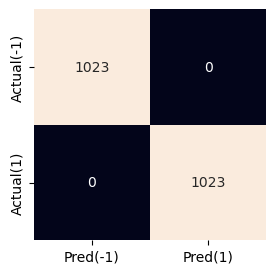

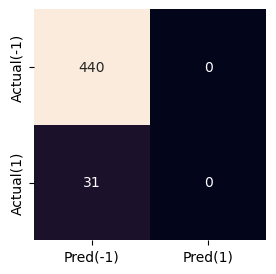

In [49]:
grid_pred_train = svm_grid.predict(train_scaled)
grid_pred_test = svm_grid.predict(test_scaled)
print(f"* The best parameters are {svm_grid.best_params_}\n")
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, grid_pred_train)
cm(y_resampled, grid_pred_train)
print("\n* Scores on Training data:", "\n--------------------------")
print_metrics(y_test, grid_pred_test)
cm(y_test, grid_pred_test)

- After tuning the base model also, the model is biased and overfitted.

In [50]:
performance_df['grid_tuned_SVM'] = [0.9341825902335457, 0.0, 0.0, 0.0, 0.5]

#### Let's try with Random search CV

In [51]:
svm_random_grid = RandomizedSearchCV(model,svm_param_grid, cv = 5)
svm_random_grid.fit(train_scaled, y_resampled)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1],
                                        'gamma': [0.001, 0.01, 0.1],
                                        'kernel': ['rbf', 'poly', 'sigmoid']})

* The best parameters are {'kernel': 'poly', 'gamma': 0.1, 'C': 1}

* Scores on Training data: 
--------------------------
Accuracy_score = 1.0
Precision_score = 1.0
Recall_score = 1.0
F1_score = 1.0
AUC_score = 1.0

* Scores on Training data: 
--------------------------
Accuracy_score = 0.8577494692144374
Precision_score = 0.125
Recall_score = 0.1935483870967742
F1_score = 0.1518987341772152
AUC_score = 0.5490469208211144


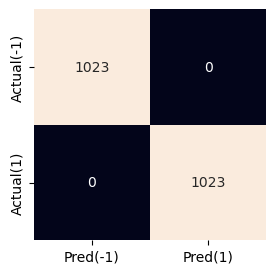

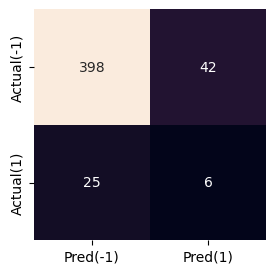

In [52]:
random_pred_train = svm_random_grid.predict(train_scaled)
random_pred_test = svm_random_grid.predict(test_scaled)
print(f"* The best parameters are {svm_random_grid.best_params_}\n")
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, random_pred_train)
cm(y_resampled, random_pred_train)
print("\n* Scores on Training data:", "\n--------------------------")
print_metrics(y_test, random_pred_test)
cm(y_test, random_pred_test)

In [53]:
performance_df['random_tuned_SVM'] = [0.861995753715499, 0.09523809523809523, 0.12903225806451613, 0.1095890410958904, 0.5213343108504398]

- The best parameters from the above model are = {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} for grid search CV.
- The above tuned svm model is overfitted as the score of the test data are too bad.
- Model is giving 100% scores for each metric in training set, but it giving 0 score for testing data. Random_svm is little better than the grid_svm model.

### 5.D) Let's apply PCA to reduce some of the features.

In [54]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(train_scaled)
train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)
variance_explained = pca.explained_variance_ratio_
cum_variance = variance_explained.cumsum()

(0.0, 1.0)

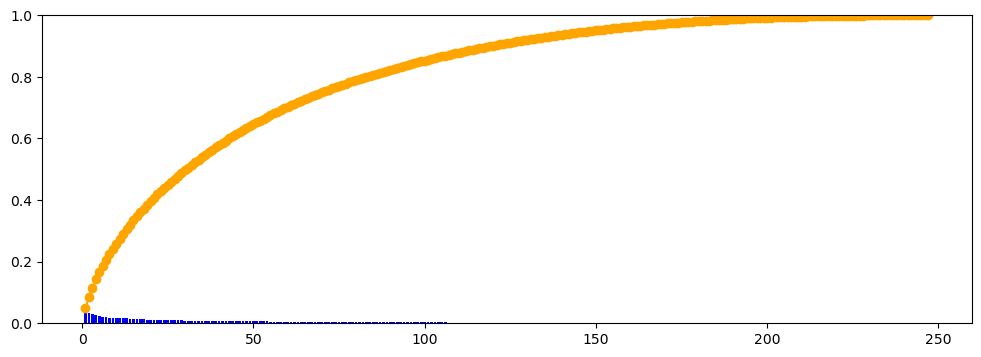

In [55]:
plt.figure(figsize = (12, 4))
plt.bar(range(1, len(variance_explained) + 1), variance_explained, color = 'blue')
plt.plot(range(1, len(cum_variance) + 1), cum_variance, marker='o', linestyle = '--', color = 'orange')
plt.ylim(0.0, 1.0)

- Here, we can observe that the first 150 principal components are explaining around 90% of the variance in the data.
- Let's take 150 PCA's and check the cum_sum of variance explained.

In [56]:
pca_2 = PCA(n_components = 150)
pca_2.fit(train_scaled)
pca_Xtrain = pca_2.transform(train_scaled)
pca_Xtest = pca_2.transform(test_scaled)
variance_explained2 = pca_2.explained_variance_ratio_
cum_variance2 = variance_explained2.cumsum()
print(f"* Total variance explained with 150 PCA's is '{np.round(cum_variance2[-1]*100.0, 2)}%'")

* Total variance explained with 150 PCA's is '95.06%'


- The first 150 principal components are explaining '95.04%' of the variance in the data approximately.
- So, we can build our models on these 150 components.

### 5.E) Let's model the data using these 150 components and print the metrics

* Scores on Training data: 
--------------------------
Accuracy_score = 0.9995112414467253
Precision_score = 0.9990234375
Recall_score = 1.0
F1_score = 0.9995114802149487
AUC_score = 0.9995112414467253

* Scores on Training data: 
--------------------------
Accuracy_score = 0.9299363057324841
Precision_score = 0.25
Recall_score = 0.03225806451612903
F1_score = 0.05714285714285714
AUC_score = 0.5127199413489736


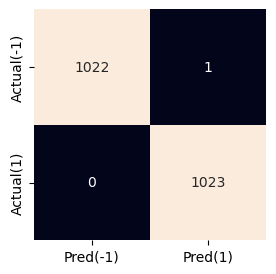

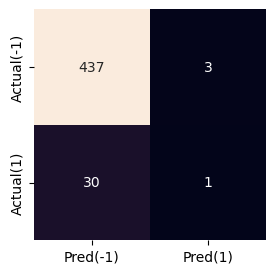

In [57]:
svm_2 = SVC()
svm_2.fit(pca_Xtrain, y_resampled)
y_test_pred = svm_2.predict(pca_Xtest)
y_train_pred = svm_2.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
cm(y_resampled, y_train_pred)
print("\n* Scores on Training data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)
cm(y_test, y_test_pred)

In [58]:
performance_df['SVM_after_PCA'] = [0.9299363057324841, 0.25, 0.03225806451612903, 0.05714285714285714, 0.5127199413489736]

- Even after applying PCA, the test scores are not increased.

### 5.F) Let's try with different ML models to increase the scores

#### Let's train a DecisionTreeClassifier() 

* Scores on Training data: 
--------------------------
Accuracy_score = 0.9081133919843597
Precision_score = 0.8487886382623224
Recall_score = 0.9931573802541545
F1_score = 0.9153153153153153
AUC_score = 0.9081133919843597

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.8067940552016986
Precision_score = 0.058823529411764705
Recall_score = 0.12903225806451613
F1_score = 0.08080808080808081
AUC_score = 0.49178885630498526


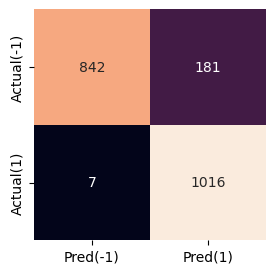

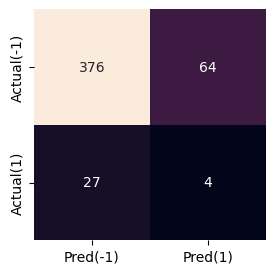

In [59]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 1, max_depth = 5)
tree.fit(pca_Xtrain, y_resampled)
y_test_pred = tree.predict(pca_Xtest)
y_train_pred = tree.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
cm(y_resampled, y_train_pred)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)
cm(y_test, y_test_pred)

In [60]:
performance_df['base_tree'] = [0.7898089171974523, 0.0641025641025641, 0.16129032258064516, 0.09174311926605505, 0.4976906158357772]

- Training set's accuracy score was 92% and testing data's accuracy_score was 78%.
- This base Decision tree also overfitted as we can observe all the other scores for training set are higher than the testing set's cores.
- Let's use GridSearchCV and Random searchCV to tune the Hyper parameters of the base model.

In [61]:
tree_param_grid = {'max_depth': range(5,11),
                  'ccp_alpha':[0.001, 0.01, 1],
                  'max_features': [ 0.2, 0.5, 0.6],
                  'criterion': ['gini', 'entropy']}
tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = tree_param_grid, cv = 5)
tree_grid.fit(pca_Xtrain, y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.001, 0.01, 1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 11),
                         'max_features': [0.2, 0.5, 0.6]})

Best Paramas are : {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.6}

* Scores on Training data: 
--------------------------
Accuracy_score = 0.9872922776148583
Precision_score = 0.9761222540592168
Recall_score = 0.9990224828934506
F1_score = 0.9874396135265701
AUC_score = 0.9872922776148583

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.881104033970276
Precision_score = 0.037037037037037035
Recall_score = 0.03225806451612903
F1_score = 0.034482758620689655
AUC_score = 0.48658357771260996


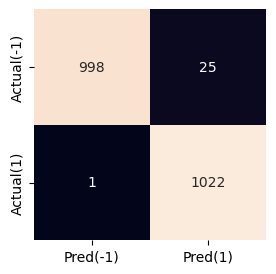

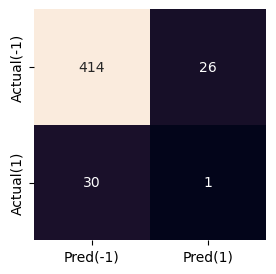

In [62]:
print(f"Best Paramas are : {tree_grid.best_params_}\n")
y_test_pred = tree_grid.predict(pca_Xtest)
y_train_pred = tree_grid.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
cm(y_resampled, y_train_pred)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)
cm(y_test, y_test_pred)

In [63]:
performance_df['grid_tree'] = [0.8407643312101911, 0.06, 0.0967741935483871, 0.07407407407407407, 0.4949780058651026]

Best Paramas are : {'max_features': 0.6, 'max_depth': 9, 'criterion': 'gini', 'ccp_alpha': 0.001}

* Scores on Training data: 
--------------------------
Accuracy_score = 0.9819159335288368
Precision_score = 0.9695238095238096
Recall_score = 0.9951124144672532
F1_score = 0.9821514712976362
AUC_score = 0.9819159335288368

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.8747346072186837
Precision_score = 0.0625
Recall_score = 0.06451612903225806
F1_score = 0.06349206349206349
AUC_score = 0.49816715542521994


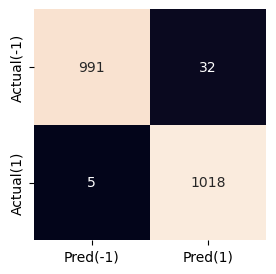

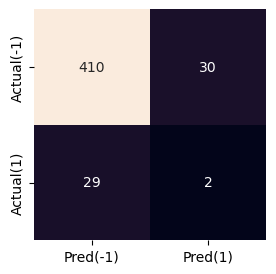

In [64]:
tree_random_grid = RandomizedSearchCV(DecisionTreeClassifier(), tree_param_grid, cv = 5)
tree_random_grid.fit(pca_Xtrain, y_resampled)
print(f"Best Paramas are : {tree_random_grid.best_params_}\n")
y_test_pred = tree_random_grid.predict(pca_Xtest)
y_train_pred = tree_random_grid.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
cm(y_resampled, y_train_pred)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)
cm(y_test, y_test_pred)

In [65]:
performance_df['random_tree'] = [0.8704883227176221, 0.10526315789473684, 0.12903225806451613, 0.11594202898550725, 0.5258797653958944]

- After tuning the parameters the scores for training data are reduced.
- with random search cv tree model's scores are increased a bit comparing with SVM models.

#### Let's train a RandomForestClassifier

* Scores on Training data: 
--------------------------
Accuracy_score = 1.0
Precision_score = 1.0
Recall_score = 1.0
F1_score = 1.0
AUC_score = 1.0

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.9341825902335457
Precision_score = 0.0
Recall_score = 0.0
F1_score = 0.0
AUC_score = 0.5


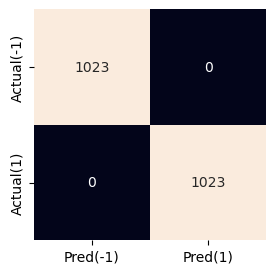

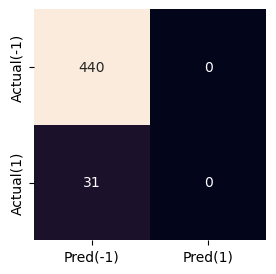

In [66]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(pca_Xtrain, y_resampled)
y_test_pred = forest.predict(pca_Xtest)
y_train_pred = forest.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
cm(y_resampled, y_train_pred)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)
cm(y_test, y_test_pred)

- This model also overfitted on training data.

In [67]:
performance_df['base_forest'] = [0.9341825902335457, 0.0, 0.0, 0.0, 0.5]

In [68]:
# Tune the parameters. 

forest_param_grid = {'n_estimators': [10, 20, 50],
    'max_depth': [5, 6, 7],
    'min_samples_leaf': [50, 150, 100],
    'max_features': [0.2, 0.4, 0.6]}
forest_grid = GridSearchCV(RandomForestClassifier(), param_grid = forest_param_grid, cv = 5)
forest_grid.fit(pca_Xtrain, y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7],
                         'max_features': [0.2, 0.4, 0.6],
                         'min_samples_leaf': [50, 150, 100],
                         'n_estimators': [10, 20, 50]})

Best Params are : {'max_depth': 7, 'max_features': 0.2, 'min_samples_leaf': 50, 'n_estimators': 50}

* Scores on Training data: 
--------------------------
Accuracy_score = 0.978494623655914
Precision_score = 0.9851337958374629
Recall_score = 0.9716520039100685
F1_score = 0.9783464566929134
AUC_score = 0.9784946236559141

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.9235668789808917
Precision_score = 0.0
Recall_score = 0.0
F1_score = 0.0
AUC_score = 0.4943181818181818


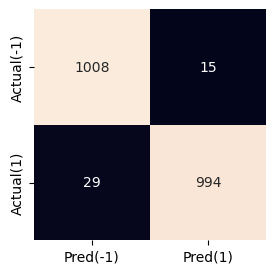

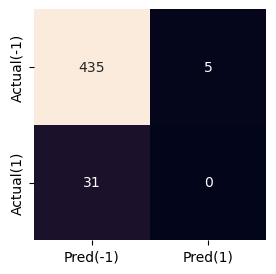

In [69]:
print(f"Best Params are : {forest_grid.best_params_}\n")
y_test_pred = forest_grid.predict(pca_Xtest)
y_train_pred = forest_grid.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
cm(y_resampled, y_train_pred)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)
cm(y_test, y_test_pred)

In [70]:
performance_df['grid_forest'] = [0.9235668789808917, 0.0, 0.0, 0.0, 0.4943181818181818]

Best Params are : {'n_estimators': 20, 'min_samples_leaf': 50, 'max_features': 0.4, 'max_depth': 6}

* Scores on Training data: 
--------------------------
Accuracy_score = 0.9765395894428153
Precision_score = 0.981243830207305
Recall_score = 0.9716520039100685
F1_score = 0.9764243614931237
AUC_score = 0.9765395894428153

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.9129511677282378
Precision_score = 0.0
Recall_score = 0.0
F1_score = 0.0
AUC_score = 0.48863636363636365


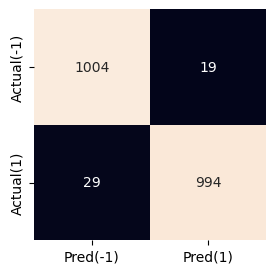

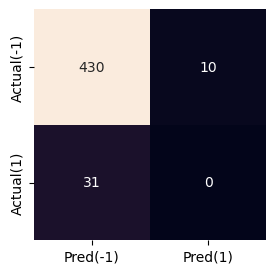

In [71]:
forest_random_grid = RandomizedSearchCV(RandomForestClassifier(), forest_param_grid, cv = 5)
forest_random_grid.fit(pca_Xtrain, y_resampled)
print(f"Best Params are : {forest_random_grid.best_params_}\n")
y_test_pred = forest_random_grid.predict(pca_Xtest)
y_train_pred = forest_random_grid.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
cm(y_resampled, y_train_pred)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)
cm(y_test, y_test_pred)

- Both models are not performing well on the testing data.

In [72]:
performance_df['random_forest'] = [0.9193205944798302, 0.0, 0.0, 0.0, 0.49204545454545456]

#### Let's model with a KNN classifier

* Scores on Training data: 
--------------------------
Accuracy_score = 0.6744868035190615
Precision_score = 0.605683836589698
Recall_score = 1.0
F1_score = 0.754424778761062
AUC_score = 0.6744868035190617

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.28662420382165604
Precision_score = 0.07520891364902507
Recall_score = 0.8709677419354839
F1_score = 0.13846153846153847
AUC_score = 0.5582111436950147


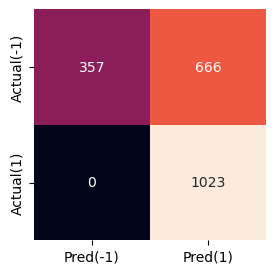

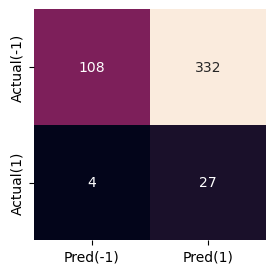

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(pca_Xtrain, y_resampled)
y_test_pred = knn.predict(pca_Xtest)
y_train_pred = knn.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
cm(y_resampled, y_train_pred)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)
cm(y_test, y_test_pred)

In [74]:
performance_df['base_KNN'] = [0.267515923566879, 0.07336956521739131, 0.8709677419354839, 0.13533834586466165, 0.5479838709677419]

In [75]:
knn_param_grid = {'n_neighbors' : range(5, 50, 2),
                 'p':[1, 2],
                 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid = knn_param_grid, cv = 5)
knn_grid.fit(pca_Xtrain, y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 50, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

Best Params are : {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

* Scores on Training data: 
--------------------------
Accuracy_score = 0.7463343108504399
Precision_score = 0.6634241245136187
Recall_score = 1.0
F1_score = 0.7976608187134503
AUC_score = 0.7463343108504399

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.3481953290870488
Precision_score = 0.07926829268292683
Recall_score = 0.8387096774193549
F1_score = 0.14484679665738162
AUC_score = 0.5761730205278592


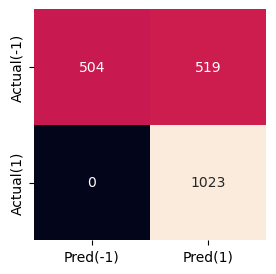

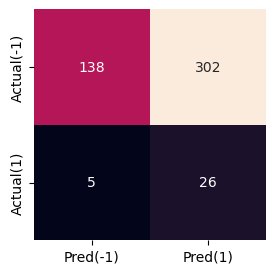

In [76]:
print(f"Best Params are : {knn_grid.best_params_}\n")
y_test_pred = knn_grid.predict(pca_Xtest)
y_train_pred = knn_grid.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
cm(y_resampled, y_train_pred)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)
cm(y_test, y_test_pred)

In [77]:
performance_df['grid_KNN'] = [0.3524416135881104, 0.07975460122699386, 0.8387096774193549, 0.14565826330532214, 0.5784457478005866]

In [78]:
knn_random_grid = RandomizedSearchCV(KNeighborsClassifier(), knn_param_grid, cv = 5)
knn_random_grid.fit(pca_Xtrain, y_resampled)
y_test_pred = knn_random_grid.predict(pca_Xtest)
y_train_pred = knn_random_grid.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)

* Scores on Training data: 
--------------------------
Accuracy_score = 0.7463343108504399
Precision_score = 0.6634241245136187
Recall_score = 1.0
F1_score = 0.7976608187134503
AUC_score = 0.7463343108504399

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.3481953290870488
Precision_score = 0.07926829268292683
Recall_score = 0.8387096774193549
F1_score = 0.14484679665738162
AUC_score = 0.5761730205278592


In [79]:
performance_df['random_KNN'] = [0.21868365180467092, 0.07124681933842239, 0.9032258064516129, 0.1320754716981132, 0.5368401759530792]

* Scores on Training data: 
--------------------------
Accuracy_score = 0.9599217986314761
Precision_score = 0.9344413665743305
Recall_score = 0.989247311827957
F1_score = 0.9610636277302944
AUC_score = 0.9599217986314761

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.8450106157112527
Precision_score = 0.21621621621621623
Recall_score = 0.5161290322580645
F1_score = 0.3047619047619048
AUC_score = 0.6921554252199413


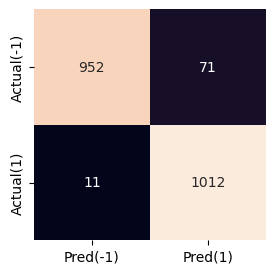

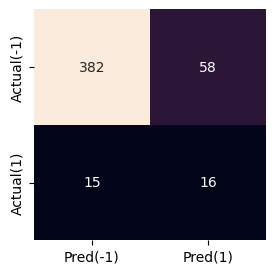

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')
lr.fit(pca_Xtrain, y_resampled)
y_test_pred = lr.predict(pca_Xtest)
y_train_pred = lr.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
cm(y_resampled, y_train_pred)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)
cm(y_test, y_test_pred)

In [81]:
performance_df['base Logi'] = [ 0.8259023354564756, 0.16883116883116883, 0.41935483870967744, 0.24074074074074073, 0.636950146627566]

* Scores on Training data: 
--------------------------
Accuracy_score = 0.9652981427174976
Precision_score = 0.9399260628465804
Recall_score = 0.9941348973607038
F1_score = 0.966270783847981
AUC_score = 0.9652981427174977

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.8407643312101911
Precision_score = 0.19444444444444445
Recall_score = 0.45161290322580644
F1_score = 0.27184466019417475
AUC_score = 0.6598973607038123


{'C': 10}

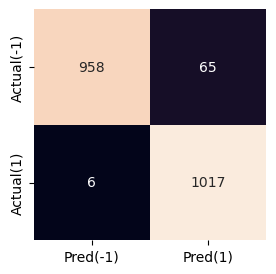

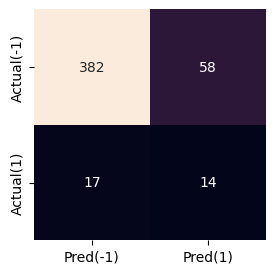

In [91]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}
logi_grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
logi_grid.fit(pca_Xtrain, y_resampled)
y_test_pred = logi_grid.predict(pca_Xtest)
y_train_pred = logi_grid.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
cm(y_resampled, y_train_pred)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)
cm(y_test, y_test_pred)
logi_grid.best_params_

In [83]:
performance_df['tuned_Logi'] = [0.8471337579617835, 0.19402985074626866, 0.41935483870967744, 0.2653061224489796, 0.6483137829912025]

In [84]:
from sklearn.ensemble import AdaBoostClassifier
ada_param_grid = {
    'n_estimators': [20,50, 100, 200],  
    'learning_rate': [0.01, 0.1, 1, 10]  
}
ada_grid = GridSearchCV(AdaBoostClassifier(), ada_param_grid, cv = 5)
ada_grid.fit(pca_Xtrain, y_resampled)
y_test_pred = ada_grid.predict(pca_Xtest)
y_train_pred = ada_grid.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)

* Scores on Training data: 
--------------------------
Accuracy_score = 1.0
Precision_score = 1.0
Recall_score = 1.0
F1_score = 1.0
AUC_score = 1.0

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.9299363057324841
Precision_score = 0.0
Recall_score = 0.0
F1_score = 0.0
AUC_score = 0.49772727272727274


In [85]:
performance_df['grid_ada'] = [0.9299363057324841, 0.0, 0.0, 0.0, 0.49772727272727274]

In [86]:
from sklearn.naive_bayes import BernoulliNB
naive = BernoulliNB()
naive.fit(pca_Xtrain, y_resampled)
y_test_pred = naive.predict(pca_Xtest)
y_train_pred = naive.predict(pca_Xtrain)
print("* Scores on Training data:", "\n--------------------------")
print_metrics(y_resampled, y_train_pred)
print("\n* Scores on Testing data:", "\n--------------------------")
print_metrics(y_test, y_test_pred)

* Scores on Training data: 
--------------------------
Accuracy_score = 0.8167155425219942
Precision_score = 0.813953488372093
Recall_score = 0.8211143695014663
F1_score = 0.8175182481751825
AUC_score = 0.8167155425219942

* Scores on Testing data: 
--------------------------
Accuracy_score = 0.732484076433121
Precision_score = 0.11382113821138211
Recall_score = 0.45161290322580644
F1_score = 0.18181818181818182
AUC_score = 0.6019428152492668


In [87]:
performance_df['naive_bayes'] = [0.7346072186836518, 0.09482758620689655, 0.3548387096774194, 0.14965986394557823, 0.558101173020528]

### 6.A) Let's compare accuracies of all the models:

In [88]:
performance_df.T

,Accuracy,Precision,Recall,F1_score,AUC_score
Base_SVM,0.932059,0.333333,0.032258,0.058824,0.513856
grid_tuned_SVM,0.934183,0.000000,0.000000,0.000000,0.500000
random_tuned_SVM,0.861996,0.095238,0.129032,0.109589,0.521334
SVM_after_PCA,0.929936,0.250000,0.032258,0.057143,0.512720
base_tree,0.789809,0.064103,0.161290,0.091743,0.497691
grid_tree,0.840764,0.060000,0.096774,0.074074,0.494978
random_tree,0.870488,0.105263,0.129032,0.115942,0.525880
base_forest,0.934183,0.000000,0.000000,0.000000,0.500000
grid_forest,0.923567,0.000000,0.000000,0.000000,0.494318
random_forest,0.919321,0.000000,0.000000,0.000000,0.492045


- Majority of the models are giving good accuracies.
- In base SVM model accuracies for training and testing are 100%, 93%.
- After applying -> KFold accuracy was 99.75 with std 0.41, stratified Kfold accuracy was 99.80% with 0.4 std.
- In LOOCV model std increased, so stratified Kfold is good.
- Base SVM, random forest are giving good accuracy scores for testing set.
- But in the classification problem we cannot only rely on the model's accuracy.
- Knn model is giving very low accuracy_score but giving good recall_scores.

### 6.B) Let's understand which model has performed well.

- Above trained models are not giving good scores for precision, recall and f1_score.
- But accuracies of the models are very good.
- Comparing with all the models, Base Logistic Regression and tuned Logistic model using different c values are giving good recall, precision, f1_score and AUC_score.
- Accuracy for training set is 97% and testing set is 84.7%.
- According to the Recall_score KNN model is performing good but accuracies are very low.
- So, Logistic Regression model is giving good performance comparing with all other models we have build on the data.

### 6.C) Let's pickle the model for Feature use.

In [89]:
import pickle
with open('logi_model.pkl', 'wb') as f:
    pickle.dump(logi_grid, f)

### 6.D) Conclusion on the results:

- As we can observe that the accuracy scores of the majority models on the testing data are good.
- But after tuning the Hyper parameters of the models, they are overfitted.
- Some of the models like random_forest and ada_boosting models are giving 0.0 scores on testing.
- Except accuracy_score all other scores are not high on the testing data in most of the models.
- Only Logistic models are giving some good scores for all the metrics.
- The data is also not enough as there is only 1567 rows with many(592) columns, the models are not performing due to outliers and curse of dimensionality.
- Hence, the Logistic Regression model is performing well on predicting the class comparing with other models.